In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

You are provided with daily historical sales data. The task is to forecast the total amount of products sold in every shop for the test set. Note that the list of shops and products slightly changes every month. Creating a robust model that can handle such situations is part of the challenge.


### File descriptions
* sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.
* test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.
* sample_submission.csv - a sample submission file in the correct format.
* items.csv - supplemental information about the items/products.
* item_categories.csv  - supplemental information about the items categories.
* shops.csv- supplemental information about the shops.

### Data fields
* ID - an Id that represents a (Shop, Item) tuple within the test set
* shop_id - unique identifier of a shop
* item_id - unique identifier of a product
* item_category_id - unique identifier of item category
* item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
* item_price - current price of an item
* date - date in format dd/mm/yyyy
* date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
* item_name - name of item
* shop_name - name of shop
* item_category_name - name of item category

In [11]:
df=pd.read_csv('sales_train.csv.gz',parse_dates=['date'])

In [13]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-02-01,0,59,22154,999.00,1.0
1,2013-03-01,0,25,2552,899.00,1.0
2,2013-05-01,0,25,2552,899.00,-1.0
3,2013-06-01,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [14]:
df_test=pd.read_csv('test.csv.gz')

In [15]:
df_test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [16]:
df_items=pd.read_csv('items.csv')

In [17]:
df_shops=pd.read_csv('shops.csv')

In [19]:
df_items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [20]:
df_shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [43]:
df_item_sum=pd.DataFrame(df.groupby(['date_block_num','item_id','item_price'])['item_cnt_day'].sum())

In [44]:
df_item_sum.reset_index(inplace=True)

In [45]:
df_item_sum.head()

,date_block_num,item_id,item_price,item_cnt_day
0,0,19,28.0,1.0
1,0,27,1890.0,2.0
2,0,27,2499.0,5.0
3,0,28,549.0,8.0
4,0,29,1890.0,1.0


In [60]:
y=df_item_sum.groupby('date_block_num')['item_cnt_day'].sum()
x=df_item_sum['date_block_num'].unique()

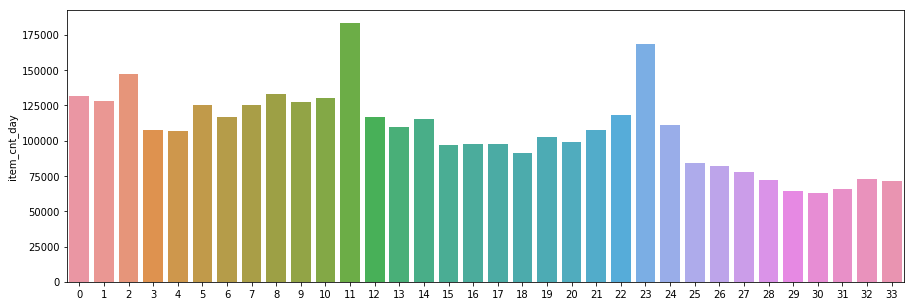

In [61]:
plt.figure(figsize=(15,5))
sns.barplot(x,y)

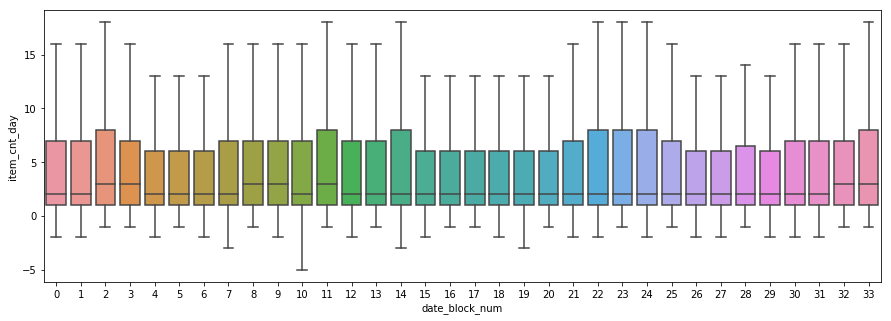

In [68]:
plt.figure(figsize=(15,5))
sns.boxplot(df_item_sum['date_block_num'],df_item_sum['item_cnt_day'],showfliers=False)

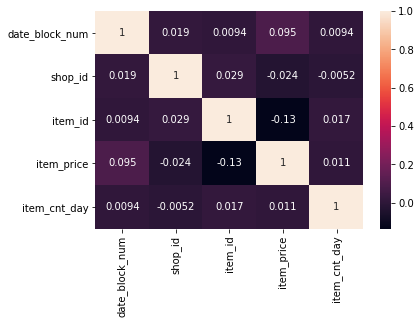

In [71]:
sns.heatmap(df.corr(),annot=True)